#Bonus Assignment

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [3]:
zip_path = '/content/drive/My\ Drive/Bootcamp\ ML2020/dataset/santa-dataset.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/santa-dataset.zip -d /content

# !rm /content/santa-dataset.zip

##Optimizer SGD, 3 Filter, 

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = SGD(lr=0.001, momentum=0.9)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 80000)             0

In [7]:
dataset_dir = '/content/santa-dataset'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [10]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 18s 3s/step - loss: 0.1983 - accuracy: 0.9275 - val_loss: 0.2549 - val_accuracy: 0.9231
Epoch 2/50
6/6 [==============================] - 17s 3s/step - loss: 0.1969 - accuracy: 0.9290 - val_loss: 0.4056 - val_accuracy: 0.8538
Epoch 3/50
6/6 [==============================] - 19s 3s/step - loss: 0.3513 - accuracy: 0.8625 - val_loss: 0.2715 - val_accuracy: 0.9192
Epoch 4/50
6/6 [==============================] - 17s 3s/step - loss: 0.3162 - accuracy: 0.8625 - val_loss: 0.2410 - val_accuracy: 0.9269
Epoch 5/50
6/6 [==============================] - 19s 3s/step - loss: 0.2444 - accuracy: 0.9094 - val_loss: 0.2658 - val_accuracy: 0.9192
Epoch 6/50
6/6 [==============================] - 17s 3s/step - loss: 0.1927 - accuracy: 0.9411 - val_loss: 0.2484 - val_accuracy: 0.9269
Epoch 7/50
6/6 [==============================] - 17s 3s/step - loss: 0.1865 - accuracy: 0.9381 - val_loss: 0.2419 - val_accuracy: 0.9269
Epoch 8/50
6/6 [==================

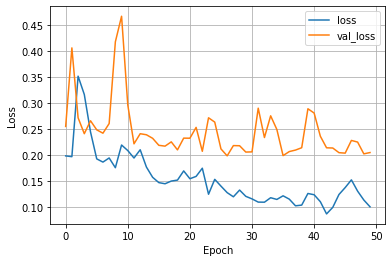

In [11]:
plot_loss(history_base_model)

##Optimizer ADAM

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)            

In [13]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [14]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 20s 3s/step - loss: 17.9841 - accuracy: 0.5060 - val_loss: 0.6959 - val_accuracy: 0.5500
Epoch 2/50
6/6 [==============================] - 17s 3s/step - loss: 0.6615 - accuracy: 0.5091 - val_loss: 0.6791 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 18s 3s/step - loss: 0.5847 - accuracy: 0.6073 - val_loss: 0.5948 - val_accuracy: 0.5654
Epoch 4/50
6/6 [==============================] - 16s 3s/step - loss: 0.5503 - accuracy: 0.7190 - val_loss: 0.5680 - val_accuracy: 0.7885
Epoch 5/50
6/6 [==============================] - 18s 3s/step - loss: 0.4888 - accuracy: 0.8459 - val_loss: 0.4799 - val_accuracy: 0.8423
Epoch 6/50
6/6 [==============================] - 17s 3s/step - loss: 0.3772 - accuracy: 0.8686 - val_loss: 0.3952 - val_accuracy: 0.8808
Epoch 7/50
6/6 [==============================] - 17s 3s/step - loss: 0.3526 - accuracy: 0.8610 - val_loss: 0.5192 - val_accuracy: 0.8077
Epoch 8/50
6/6 [=================

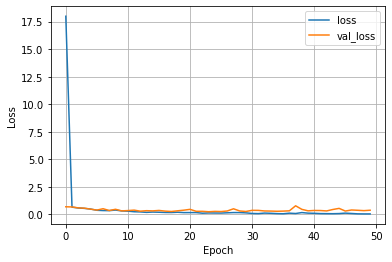

In [15]:
plot_loss(history_base_model)

##Optimizer Adadelta

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adadelta

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)            

In [17]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [18]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 21s 4s/step - loss: 0.7249 - accuracy: 0.5272 - val_loss: 0.7038 - val_accuracy: 0.5154
Epoch 2/50
6/6 [==============================] - 21s 3s/step - loss: 0.6883 - accuracy: 0.4743 - val_loss: 0.6890 - val_accuracy: 0.4923
Epoch 3/50
6/6 [==============================] - 18s 3s/step - loss: 0.6856 - accuracy: 0.4985 - val_loss: 0.6838 - val_accuracy: 0.4769
Epoch 4/50
6/6 [==============================] - 18s 3s/step - loss: 0.6885 - accuracy: 0.4955 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch 5/50
6/6 [==============================] - 18s 3s/step - loss: 0.6802 - accuracy: 0.5030 - val_loss: 0.6772 - val_accuracy: 0.5269
Epoch 6/50
6/6 [==============================] - 19s 3s/step - loss: 0.6735 - accuracy: 0.5242 - val_loss: 0.6716 - val_accuracy: 0.5077
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.6740 - accuracy: 0.5166 - val_loss: 0.6682 - val_accuracy: 0.4962
Epoch 8/50
6/6 [==================

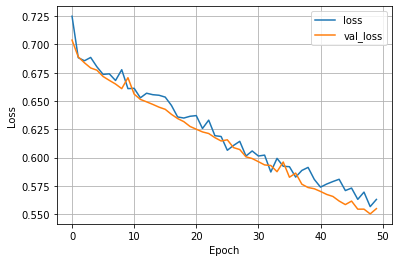

In [20]:
plot_loss(history_base_model)

##Optimizer Adamax

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adamax

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adamax(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 80000)            

In [22]:
train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 662 images belonging to 2 classes.
Found 260 images belonging to 2 classes.


In [23]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=50)

Epoch 1/50
6/6 [==============================] - 24s 4s/step - loss: 22.8558 - accuracy: 0.4819 - val_loss: 3.0408 - val_accuracy: 0.5000
Epoch 2/50
6/6 [==============================] - 19s 3s/step - loss: 1.9870 - accuracy: 0.5030 - val_loss: 1.2705 - val_accuracy: 0.5000
Epoch 3/50
6/6 [==============================] - 17s 3s/step - loss: 0.7824 - accuracy: 0.5000 - val_loss: 0.6216 - val_accuracy: 0.5000
Epoch 4/50
6/6 [==============================] - 19s 3s/step - loss: 0.5863 - accuracy: 0.6133 - val_loss: 0.5958 - val_accuracy: 0.5808
Epoch 5/50
6/6 [==============================] - 21s 4s/step - loss: 0.5398 - accuracy: 0.6375 - val_loss: 0.5618 - val_accuracy: 0.6385
Epoch 6/50
6/6 [==============================] - 21s 4s/step - loss: 0.5042 - accuracy: 0.8006 - val_loss: 0.5271 - val_accuracy: 0.8077
Epoch 7/50
6/6 [==============================] - 19s 3s/step - loss: 0.4606 - accuracy: 0.8701 - val_loss: 0.5090 - val_accuracy: 0.8308
Epoch 8/50
6/6 [=================

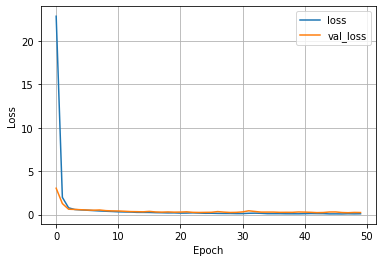

In [24]:
plot_loss(history_base_model)

Hasil terbaik yang saya dapat adalah dengan menggunakan optimizer SGD dengan tingkat akurasi 93% dan val_loss 21%